In [1]:
import numpy as np
import matplotlib.pyplot as plt

dots = 10000

In [2]:
def composite_simpson(a, b, n, f):
    n += (n + 1) % 2
    
    pr = n - 1
    h = (b - a) / pr
    x = a + h                  #x_2
    
    sum1 = 0
    sum2 = f(x)                #f(x_2)
    for i in range(1, pr // 2):
        x += 2 * h
        sum1 += f(x - h)       #f(x_3),f(x_5), ...
        sum2 += f(x)           #f(x_4),f(x_6), ...
        
    result = (h / 3) * (f(a) + 2 * sum1 + 4 * sum2 + f(b))
    
    return result

In [3]:
def composite_trapezoid(a, b, n, f):
    pr = n - 1
    
    h = (b - a) / pr
    x = a
    
    sum0 = 0
    for i in range(2, pr + 1):
        x += h
        sum0 += f(x)
        
    result = (h / 2) * (f(a) + 2 * sum0 + f(b))
    
    return result

In [4]:
def under_integral_function(y):
    C = 1.03439984
    
    return 1 / np.sqrt((C - y) * y)

In [5]:
def error_for_function(a, b, n, func):
    global dots
    
    ta = 1 / dots
    C = 1.03439984
    g = 9.81
    T = 1.75418438
    
    exact_integral = np.sqrt(2 * C / g) * (T - ta)
    qq = np.sqrt(C / (2 * g))
    
    summ = qq * (func(a, b, n, under_integral_function) + func(1, b, n, under_integral_function)) 
    er0 = np.abs(exact_integral - summ)
    
    return er0

In [7]:
def plotParagraph3():
    global dots
    fig, ax = plt.subplots(figsize=(12, 8))
    
    C = 1.03439984
    n = np.linspace(3, 9999, 9997, dtype=int)
    a = 1 / dots
    b = C - 1 / dots
    ax.loglog((b - a) / (n - 1), [error_for_function(a, b, n_, composite_simpson) for n_ in n], 'o', label='simpson', markersize = 2)
    ax.loglog((b - a) / (n - 1), [error_for_function(a, b, n_, composite_trapezoid) for n_ in n], 'o', label='trapezoid', markersize = 2)

    ax.grid(True)
    ax.set_xlabel(r'$h$', fontsize=16)
    ax.set_ylabel(r'$E$', fontsize=16)
    ax.legend(fontsize=16)
    
    plt.tight_layout()
    plt.savefig('basicPlot3.pdf')

KeyboardInterrupt: 

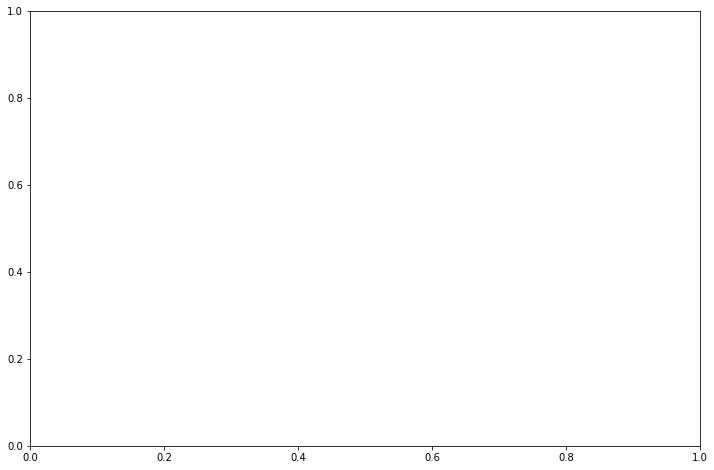

In [8]:
if __name__ == '__main__':
    plotParagraph3()